In [1]:
!wget https://storage.googleapis.com/noaa-passive-bioacoustic/sanctsound/products/sound_clips/mb01/sanctsound_mb01_01_sound_clips/data/SanctSound_MB01_01_humpbackwhale_20181118T115929Z.wav

--2024-12-02 11:32:54--  https://storage.googleapis.com/noaa-passive-bioacoustic/sanctsound/products/sound_clips/mb01/sanctsound_mb01_01_sound_clips/data/SanctSound_MB01_01_humpbackwhale_20181118T115929Z.wav
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.209.27, 216.58.205.59, 142.250.180.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.209.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115200244 (110M) [audio/x-wav]
Saving to: ‘SanctSound_MB01_01_humpbackwhale_20181118T115929Z.wav’

SanctSound_MB01_01_ 100%[===================>] 109,86M  34,4MB/s    in 3,8s    

2024-12-02 11:32:58 (28,8 MB/s) - ‘SanctSound_MB01_01_humpbackwhale_20181118T115929Z.wav’ saved [115200244/115200244]



In [ ]:
%matplotlib inline
import librosa
import numpy as np
import pandas as pd
import soundfile
import matplotlib.pyplot as plt

In [7]:
n_fft = 2048
win_length = n_fft // 8
hop_length = win_length // 2
snippet, sr = soundfile.read(
    "/home/monaco/bt_analysis/code/LEIT-motifs/SanctSound_MB01_01_humpbackwhale_20181118T115929Z.wav"
)

(32, 450001)


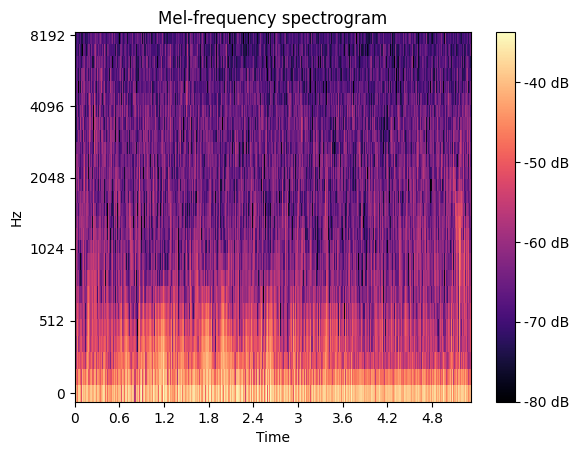

In [ ]:
S = librosa.feature.melspectrogram(
    y=snippet,
    sr=sr,
    n_mels=32,
    fmax=8000,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(
    S_dB[5:, :1000], x_axis="time", y_axis="mel", sr=sr, fmax=8000, ax=ax
)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
ax.set(title="Mel-frequency spectrogram")

print(S_dB.shape)
S_dB = S_dB.astype(np.float32)

In [9]:
df = pd.DataFrame(S_dB)
df.to_parquet("Datasets/whales.parquet")